In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import gamma
from scipy.signal import find_peaks
import os
from scipy.stats import norm, chisquare
from sklearn.mixture import GaussianMixture
import pandas as pd

# Enable implicit multi-threading (optional)
ROOT.ROOT.EnableImplicitMT()

%matplotlib widget

In [ ]:

# Open the ROOT file
with ROOT.TFile.Open("./data/secondary_num.root") as file:
    if not file or file.IsZombie():
        print("Error opening file.")
        exit()

    # Get the TTree
    tree = file.Get("sec_electrons")
    if not tree:
        print("Tree not found.")
        exit()

    # Set up the branch name you want to extract
    branch_name = "gain"

    # Use RDataFrame for convenience
    df = ROOT.RDataFrame(tree)

    # Convert the branch to a NumPy array
    gains = np.array(df.AsNumpy([branch_name])[branch_name])

    tree = file.Get("electrons")
    df = ROOT.RDataFrame(tree)
    xfs  = np.array(df.AsNumpy(['xf'])['xf']) * 10
    yfs  = np.array(df.AsNumpy(['yf'])['yf']) * 10

with ROOT.TFile.Open("./data/secondary_num2.root") as file:
    if not file or file.IsZombie():
        print("Error opening file.")
        exit()

    # Get the TTree
    tree = file.Get("sec_electrons")
    if not tree:
        print("Tree not found.")
        exit()

    # Set up the branch name you want to extract
    branch_name = "gain"

    # Use RDataFrame for convenience
    df = ROOT.RDataFrame(tree)

    # Convert the branch to a NumPy array
    arr = np.array(df.AsNumpy([branch_name])[branch_name])
    gains = np.concatenate((gains, arr))

    tree = file.Get("electrons")
    df = ROOT.RDataFrame(tree)
    arr  = np.array(df.AsNumpy(['xf'])['xf']) * 10
    xfs  = np.concatenate((xfs, arr))
    arr  = np.array(df.AsNumpy(['yf'])['yf']) * 10
    yfs  = np.concatenate((yfs, arr))

with ROOT.TFile.Open("./data/secondary_num3.root") as file:
    if not file or file.IsZombie():
        print("Error opening file.")
        exit()

    # Get the TTree
    tree = file.Get("sec_electrons")
    if not tree:
        print("Tree not found.")
        exit()

    # Set up the branch name you want to extract
    branch_name = "gain"

    # Use RDataFrame for convenience
    df = ROOT.RDataFrame(tree)

    # Convert the branch to a NumPy array
    arr = np.array(df.AsNumpy([branch_name])[branch_name])
    gains = np.concatenate((gains, arr))

    tree = file.Get("electrons")
    df = ROOT.RDataFrame(tree)
    arr  = np.array(df.AsNumpy(['xf'])['xf']) * 10
    xfs  = np.concatenate((xfs, arr))
    arr  = np.array(df.AsNumpy(['yf'])['yf']) * 10
    yfs  = np.concatenate((yfs, arr))

with ROOT.TFile.Open("./data/secondary_num4.root") as file:
    if not file or file.IsZombie():
        print("Error opening file.")
        exit()

    # Get the TTree
    tree = file.Get("sec_electrons")
    if not tree:
        print("Tree not found.")
        exit()

    # Set up the branch name you want to extract
    branch_name = "gain"

    # Use RDataFrame for convenience
    df = ROOT.RDataFrame(tree)

    # Convert the branch to a NumPy array
    arr = np.array(df.AsNumpy([branch_name])[branch_name])
    gains = np.concatenate((gains, arr))

    tree = file.Get("electrons")
    df = ROOT.RDataFrame(tree)
    arr  = np.array(df.AsNumpy(['xf'])['xf']) * 10
    xfs  = np.concatenate((xfs, arr))
    arr  = np.array(df.AsNumpy(['yf'])['yf']) * 10
    yfs  = np.concatenate((yfs, arr))

with ROOT.TFile.Open("./data/secondary_num.root") as file:
    if not file or file.IsZombie():
        print("Error opening file.")
        exit()

    # Get the TTree
    tree = file.Get("sec_electrons")
    if not tree:
        print("Tree not found.")
        exit()

    # Set up the branch name you want to extract
    branch_name = "gain"

    # Use RDataFrame for convenience
    df = ROOT.RDataFrame(tree)

    # Convert the branch to a NumPy array
    arr = np.array(df.AsNumpy([branch_name])[branch_name])
    gains = np.concatenate((gains, arr))

    tree = file.Get("electrons")
    df = ROOT.RDataFrame(tree)
    arr  = np.array(df.AsNumpy(['xf'])['xf']) * 10
    xfs  = np.concatenate((xfs, arr))
    arr  = np.array(df.AsNumpy(['yf'])['yf']) * 10
    yfs  = np.concatenate((yfs, arr))





/var/folders/p4/z5pfwnjs7x7d9zcwks7kn0j80000gn/T/ipykernel_58312/195034671.py:22: RuntimeWarning: invalid value encountered in scalar power
  return norm * (beta**(1 + theta)) / gamma(1 + theta) * x**theta * np.exp(-beta * x)
/var/folders/p4/z5pfwnjs7x7d9zcwks7kn0j80000gn/T/ipykernel_58312/195034671.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


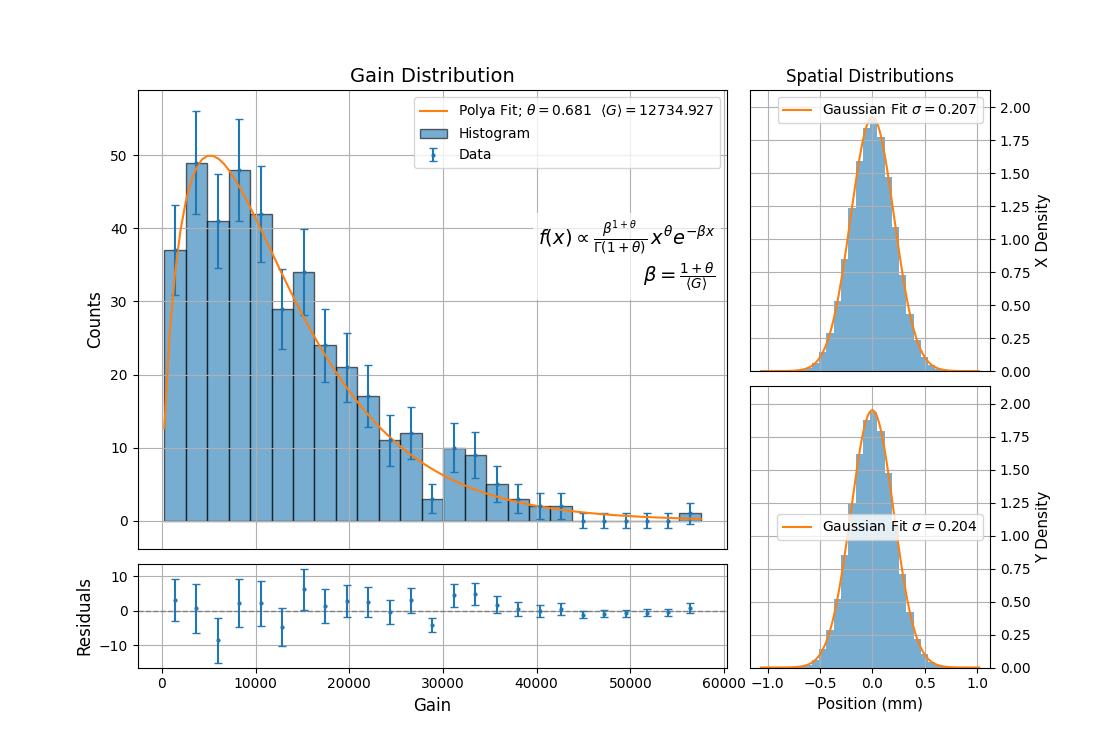

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy.special import gamma
from scipy.stats import norm

num_bins = 25
counts, bin_edges = np.histogram(gains, bins=num_bins)

# Calculate bin centers from edges
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# X = bin centers, Y = counts
err = np.sqrt(counts +1)
X = bin_centers
Y = counts

# --- Polya PDF ---
def polya_pdf(x, theta, mean_gain, norm):
    beta = (1 + theta) / mean_gain
    return norm * (beta**(1 + theta)) / gamma(1 + theta) * x**theta * np.exp(-beta * x)

# --- Fit Polya ---
p0 = [1.0, np.mean(gains), np.max(counts)]
params, cov = curve_fit(polya_pdf, bin_centers, counts, p0=p0, sigma=err, absolute_sigma=True)
theta_fit, mean_fit, norm_fit = params
fit_vals = polya_pdf(bin_centers, *params)
residuals = counts - fit_vals

# --- Gaussian fits ---
xfs_mean, xfs_std = norm.fit(xfs)
yfs_mean, yfs_std = norm.fit(yfs)

# Shared x/y range for both Gaussian plots
gauss_min = min(np.min(xfs), np.min(yfs))
gauss_max = max(np.max(xfs), np.max(yfs))
gauss_fit_x = np.linspace(gauss_min, gauss_max, 400)
xfs_pdf = norm.pdf(gauss_fit_x, xfs_mean, xfs_std)
yfs_pdf = norm.pdf(gauss_fit_x, yfs_mean, yfs_std)

# Shared y-limit for both histograms
max_density = max(
    np.max(np.histogram(xfs, bins=30, range=(gauss_min, gauss_max), density=True)[0]),
    np.max(np.histogram(yfs, bins=30, range=(gauss_min, gauss_max), density=True)[0])
) * 1.1

# --- Figure layout ---
fig = plt.figure(figsize=(11, 7.5))
gs = GridSpec(10, 10, figure=fig, wspace=0.35, hspace=0.35)

# Polya + residuals (shared x-axis)
ax_polya = fig.add_subplot(gs[0:8, 0:7])
ax_res = fig.add_subplot(gs[8:10, 0:7], sharex=ax_polya)

# Gaussians with shared axes
ax_x = fig.add_subplot(gs[0:5, 7:10])
ax_y = fig.add_subplot(gs[5:10, 7:10], sharex=ax_x, sharey=ax_x)

# --- Polya main plot ---
ax_polya.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0],
             alpha=0.6, label="Histogram", edgecolor='black')
ax_polya.errorbar(bin_centers, counts, yerr=err, fmt='o', markersize=2, capsize=3, label="Data")
x_fit = np.linspace(np.min(gains), np.max(gains), 100)
ax_polya.plot(x_fit, polya_pdf(x_fit, *params),
              label=fr"Polya Fit; $\theta={theta_fit:.3f}$  $\langle G\rangle={mean_fit:.3f}$")
ax_polya.set_ylabel("Counts", fontsize=12)
ax_polya.set_title("Gain Distribution", fontsize=14)
ax_polya.grid(True)
ax_polya.legend(fontsize=10, loc="best")
polya_eq = r"$f(x)\propto \frac{\beta^{1+\theta}}{\Gamma(1+\theta)}\,x^{\theta}e^{-\beta x}$"

beta = r"$\beta = \frac{1+\theta}{\langle G \rangle}$"
polya_eq = r"$f(x)\propto \frac{\beta^{1+\theta}}{\Gamma(1+\theta)}\,x^{\theta}e^{-\beta x}$" + "\n" + beta

ax_polya.text(0.98, 0.72, polya_eq, transform=ax_polya.transAxes, fontsize=14,
              va='top', ha='right', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
# Removed Chi²/ndf annotation
ax_polya.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

# --- Residuals ---
ax_res.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_res.errorbar(bin_centers, residuals, yerr=err, fmt='o', markersize=2, capsize=3)
ax_res.set_xlabel("Gain", fontsize=12)
ax_res.set_ylabel("Residuals", fontsize=12)
ax_res.grid(True)

# --- X Gaussian (top) ---
ax_x.hist(xfs, bins=30, range=(gauss_min, gauss_max), density=True, alpha=0.6)
ax_x.plot(gauss_fit_x, xfs_pdf, '-', label=fr"Gaussian Fit $\sigma={xfs_std:.3f}$")
ax_x.set_title("Spatial Distributions", fontsize=12)
ax_x.set_ylim(0, max_density)
ax_x.legend(fontsize=10, loc="best")
ax_x.grid(True)
ax_x.yaxis.set_label_position("right")
ax_x.yaxis.tick_right()
ax_x.set_ylabel("X Density", fontsize=11)
ax_x.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

# --- Y Gaussian (bottom) ---
ax_y.hist(yfs, bins=30, range=(gauss_min, gauss_max), density=True, alpha=0.6)
ax_y.plot(gauss_fit_x, yfs_pdf, '-', label=fr"Gaussian Fit $\sigma={yfs_std:.3f}$")
# Removed title from bottom Gaussian
ax_y.set_xlabel("Position (mm)", fontsize=11)
ax_y.set_ylim(0, max_density)
ax_y.legend(fontsize=10, loc="best")
ax_y.grid(True)
ax_y.yaxis.set_label_position("right")
ax_y.yaxis.tick_right()
ax_y.set_ylabel("Y Density", fontsize=11)


plt.tight_layout()
plt.show()
